In [1]:
import boto3
import botocore
from sagemaker import get_execution_role

role = get_execution_role()

BUCKET_NAME = ''
KEY1 = 'ECalImage/data/eplus.hdf5'
KEY2 = 'ECalImage/data/gamma.hdf5'
KEY3 = 'ECalImage/data/piplus.hdf5'

s3 = boto3.resource('s3')

In [2]:
try:
    s3.Bucket(BUCKET_NAME).download_file(KEY1, '/home/ec2-user/SageMaker/QHack/data/eplus.hdf5')
    s3.Bucket(BUCKET_NAME).download_file(KEY2, '/home/ec2-user/SageMaker/QHack/data/gamma.hdf5')
    s3.Bucket(BUCKET_NAME).download_file(KEY3, '/home/ec2-user/SageMaker/QHack/data/piplus.hdf5')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

In [3]:
import deepdish.io as io
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [4]:
d_gamma = h5py.File('../data/gamma.hdf5', 'r')
d_eplus = h5py.File('../data/eplus.hdf5', 'r')
d_piplus = h5py.File('../data/piplus.hdf5', 'r')

In [5]:
gamma_0 = d_gamma['layer_0'][:]
gamma_1 = d_gamma['layer_1'][:]
gamma_2 = d_gamma['layer_2'][:]

eplus_0 = d_eplus['layer_0'][:]
eplus_1 = d_eplus['layer_1'][:]
eplus_2 = d_eplus['layer_2'][:]

piplus_0 = d_piplus['layer_0'][:]
piplus_1 = d_piplus['layer_1'][:]
piplus_2 = d_piplus['layer_2'][:]

In [6]:
real_images_gamma = [gamma_0, gamma_1, gamma_2]
real_images_eplus = [eplus_0, eplus_1, eplus_2]
real_images_piplus = [piplus_0, piplus_1, piplus_2]

In [7]:
sizes = [
    gamma_0.shape[1], gamma_0.shape[2],
    gamma_1.shape[1], gamma_1.shape[2],
    gamma_2.shape[1], gamma_2.shape[2]]
print(sizes)

[3, 96, 12, 12, 12, 6]


In [8]:
matplotlib.rcParams.update({'font.size': 50})
def plot_image(image, layer, vmin=None, vmax=None):
    '''
    Args:
    -----
        image: ndarray with energies collected by each calo cell
        layer: int in {0,1,2}, useful to resize image correctly
        vmin: float, min energy to clip at
        vmax: float, max energy to clip at
    '''
    fig = plt.figure(figsize=(20,20))
    im = plt.imshow(image,
               aspect=float(sizes[layer*2 + 1])/sizes[layer*2],
               interpolation='nearest',
               norm=LogNorm(vmin, vmax)
    )
    cbar = plt.colorbar(fraction=0.0455)
    cbar.set_label(r'Energy (MeV)', y=0.83)
    cbar.ax.tick_params()
   
    xticks = range(sizes[layer*2 + 1])
    yticks = range(sizes[layer*2])
    if layer == 0:
        xticks = xticks[::10]
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.xlabel(r'$\eta$ Cell ID')
    plt.ylabel(r'$\phi$ Cell ID')

    plt.tight_layout()
    return im

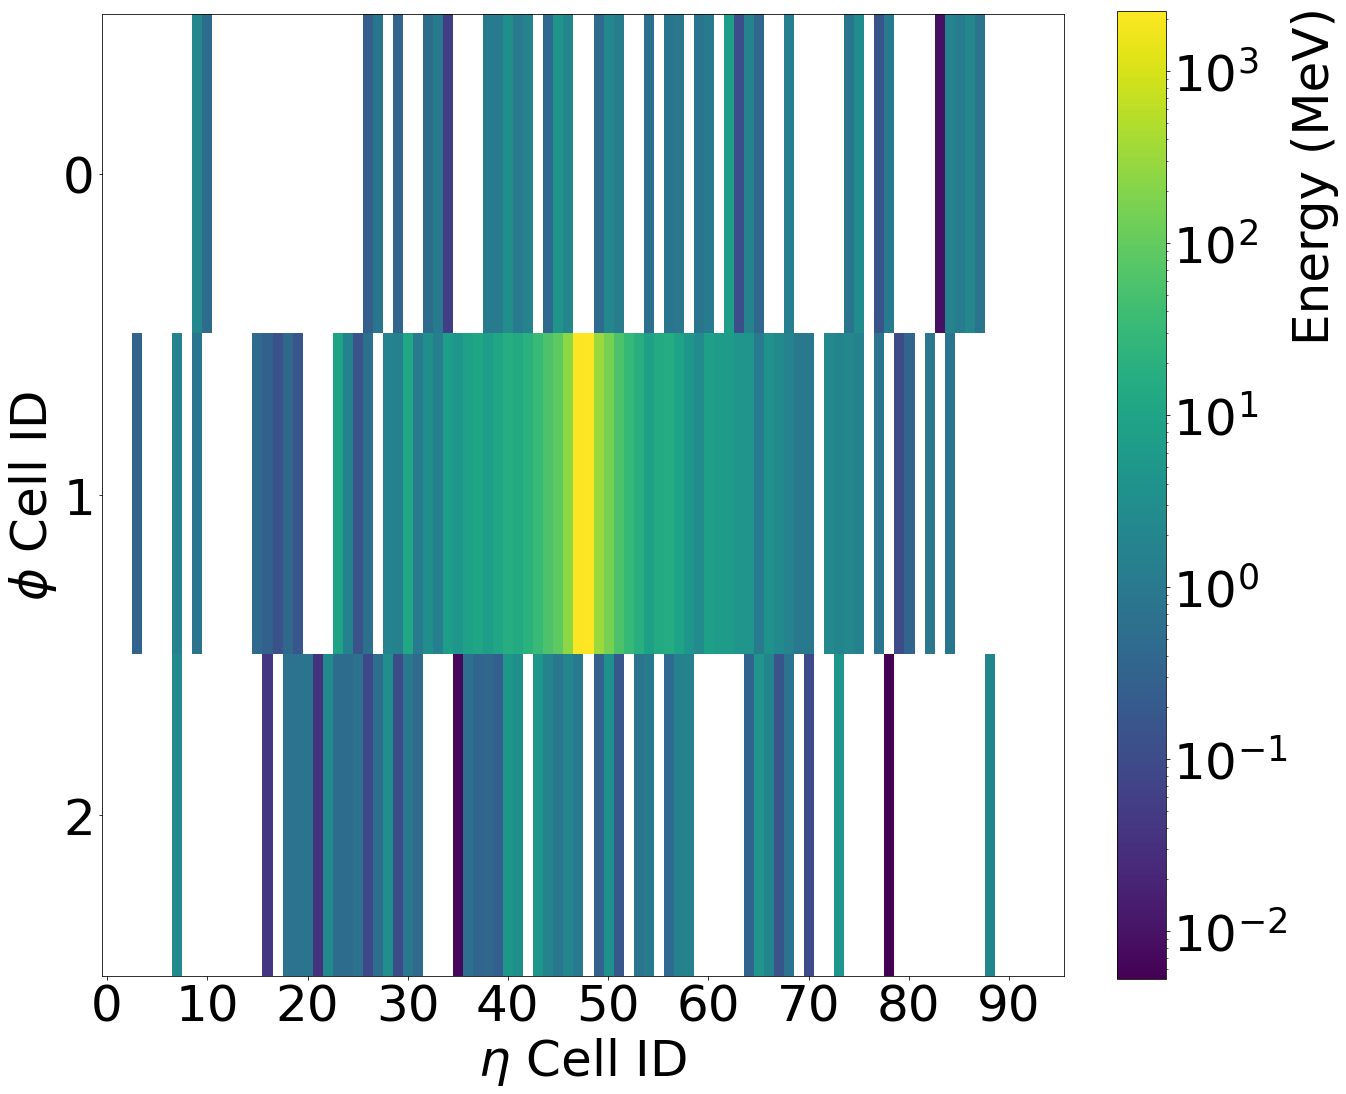

In [9]:
imageix = 0 # let's look at the very first shower
plot_image(gamma_0[imageix], layer=0)

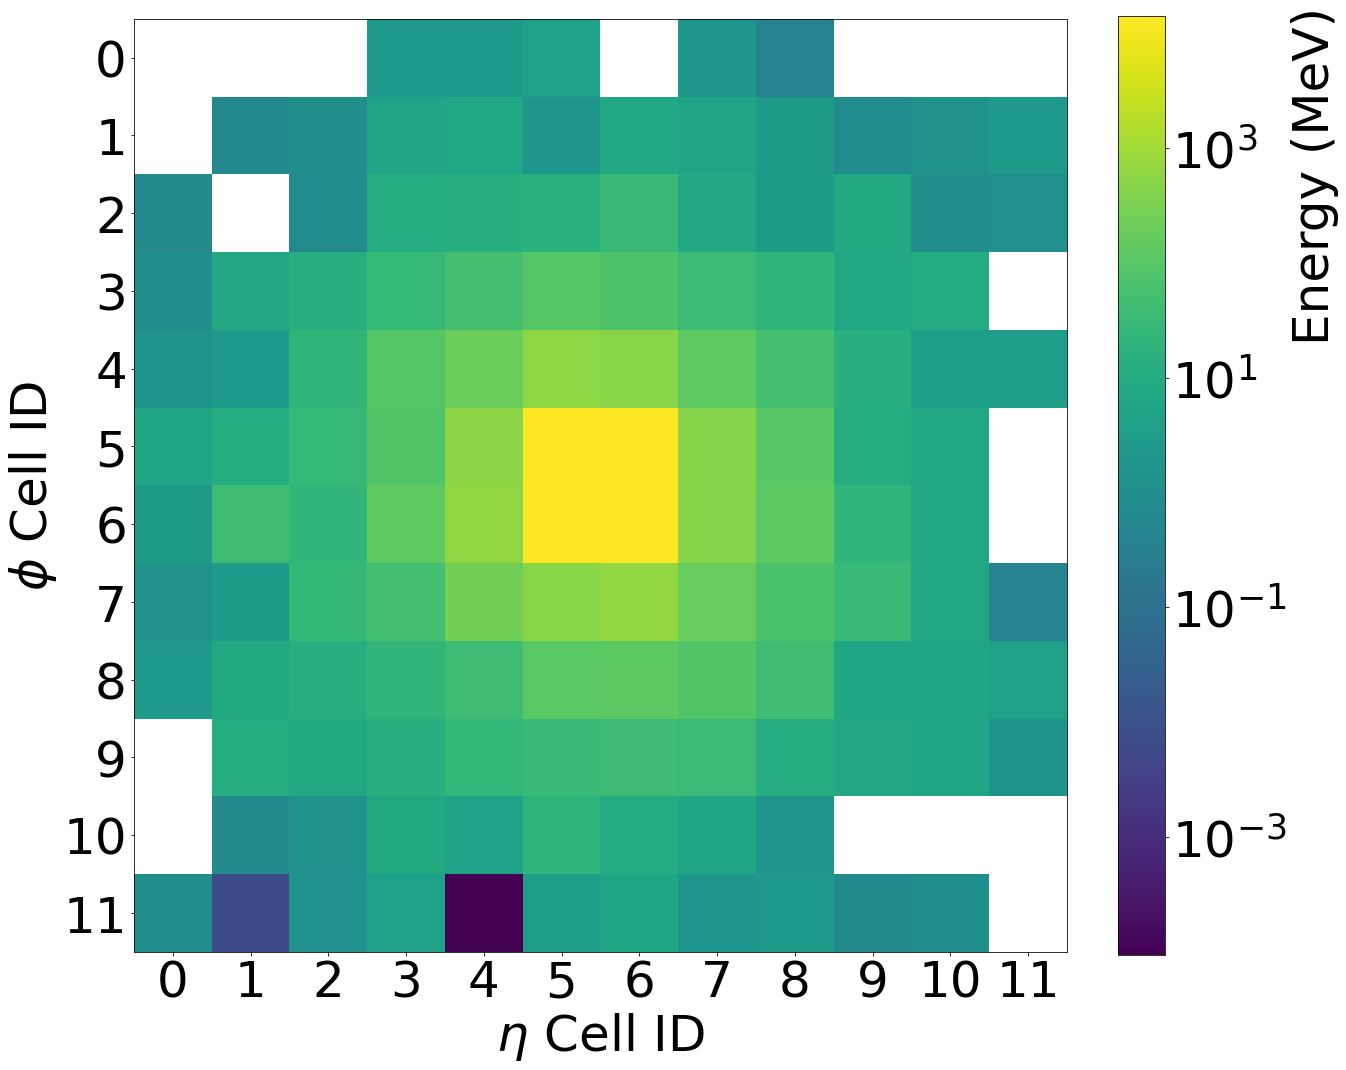

In [10]:
im = plot_image(gamma_1[imageix], layer=1)

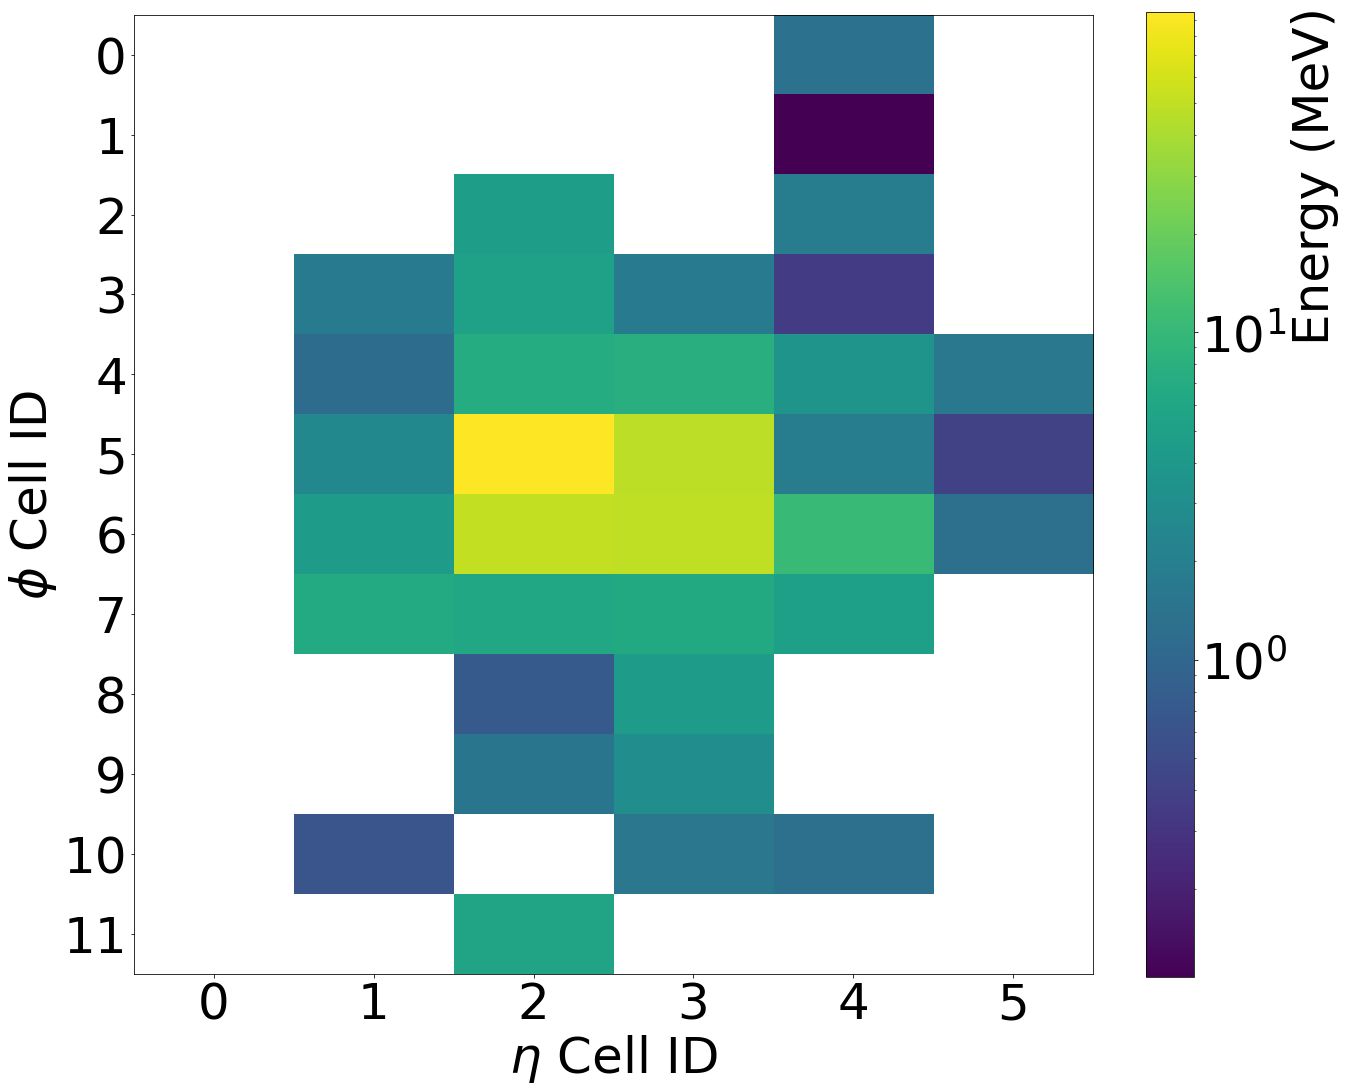

In [11]:
plot_image(gamma_2[imageix], layer=2)

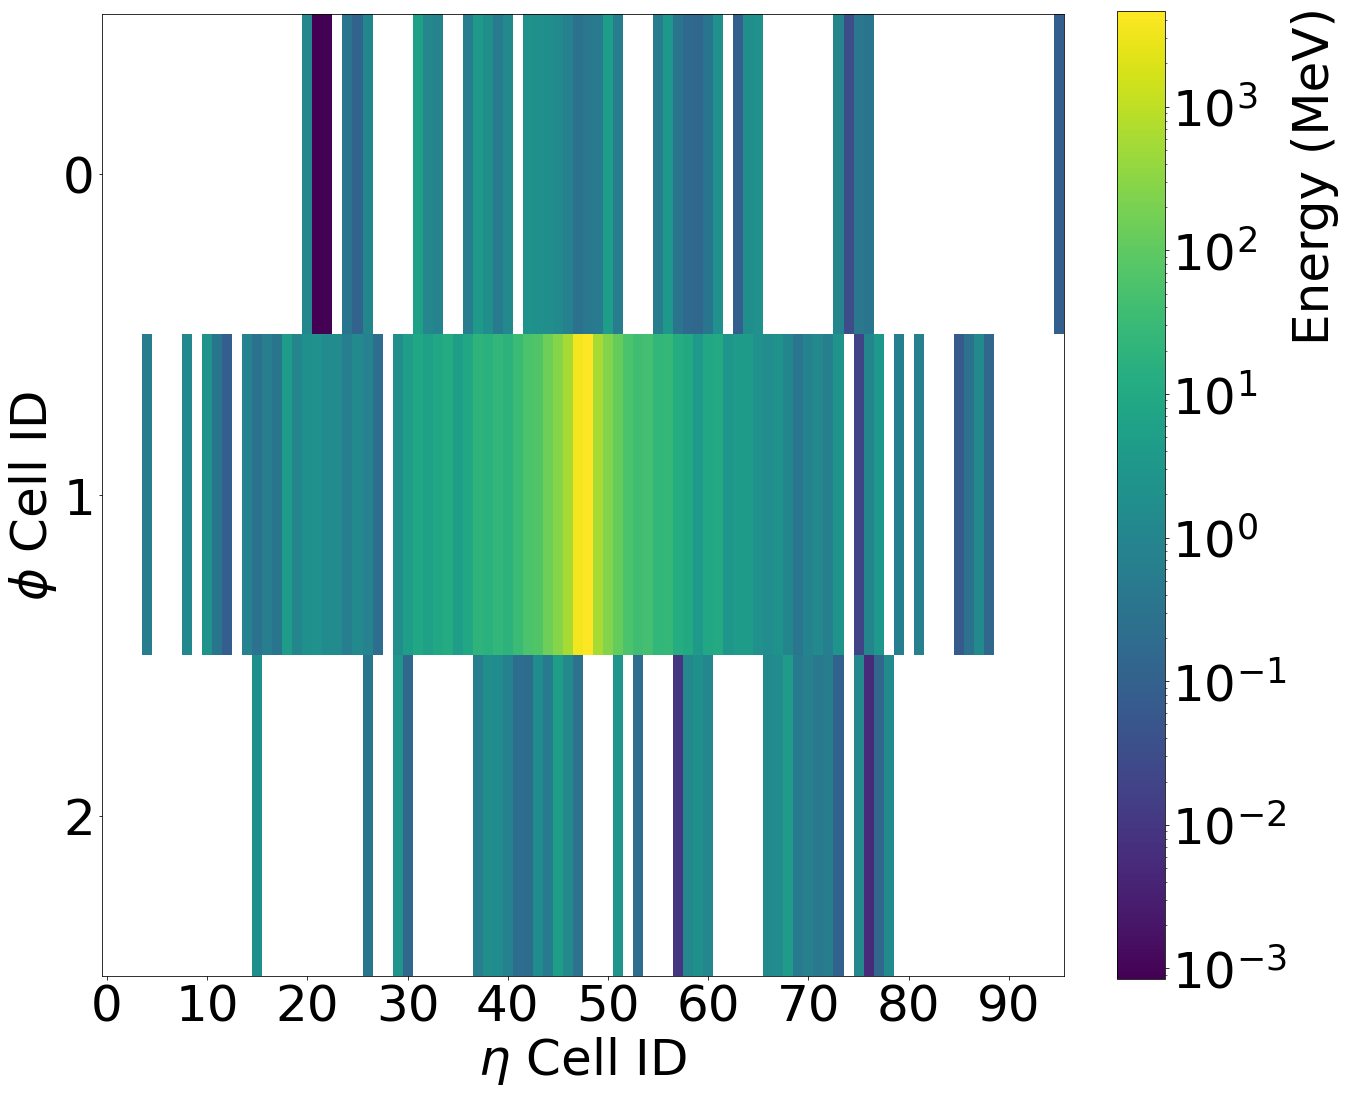

In [12]:
plot_image(eplus_0[imageix], layer=0)

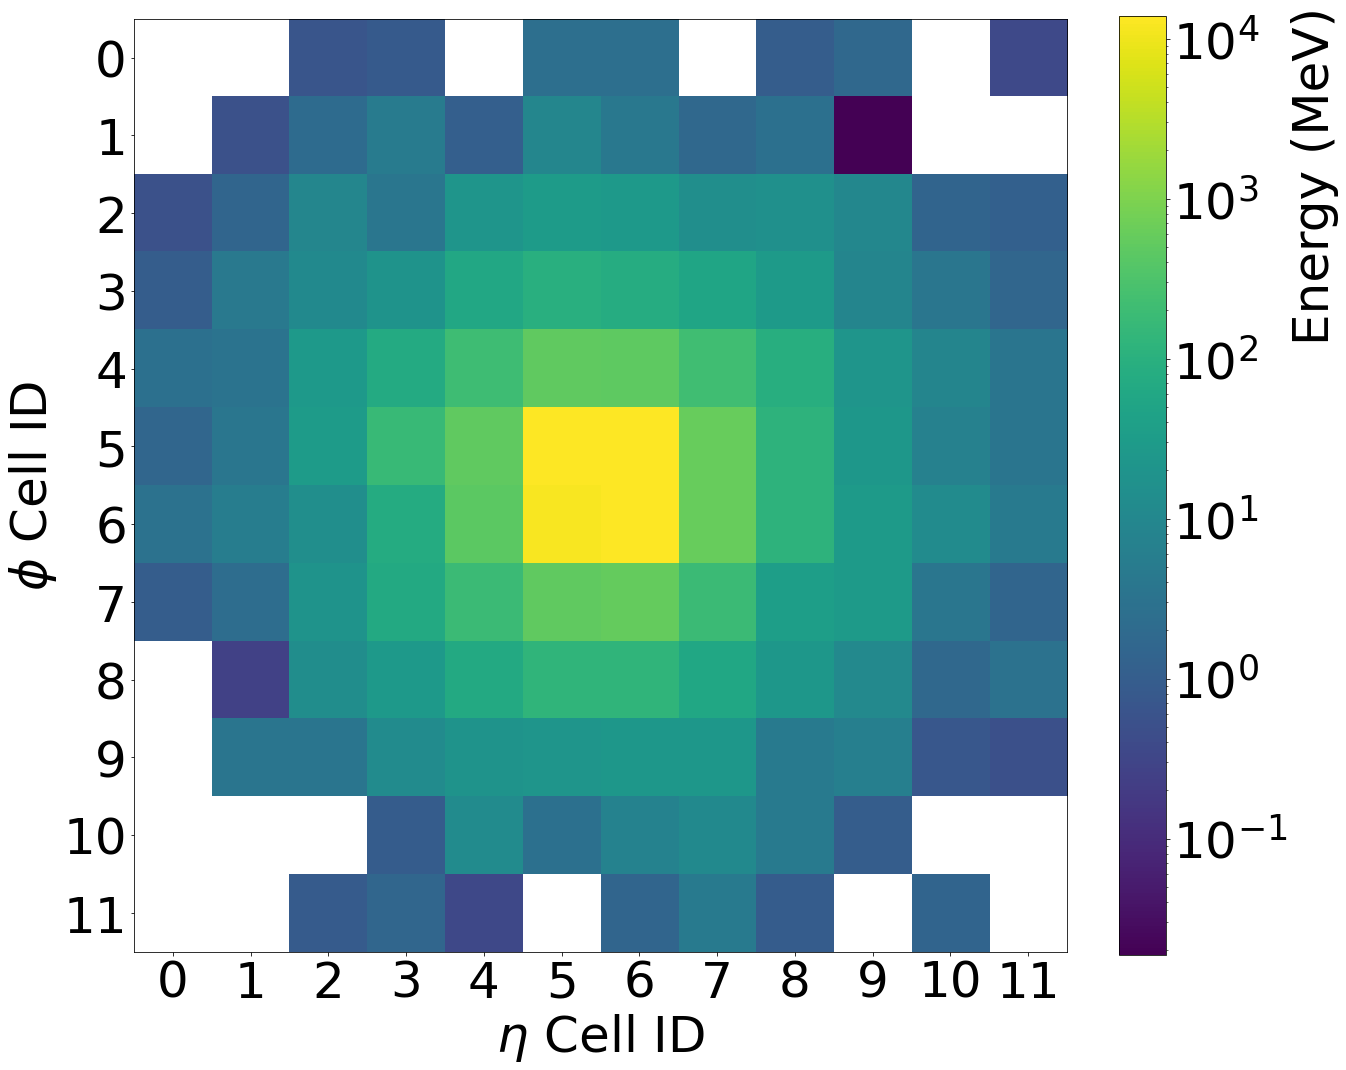

In [13]:
plot_image(eplus_1[imageix], layer=1)

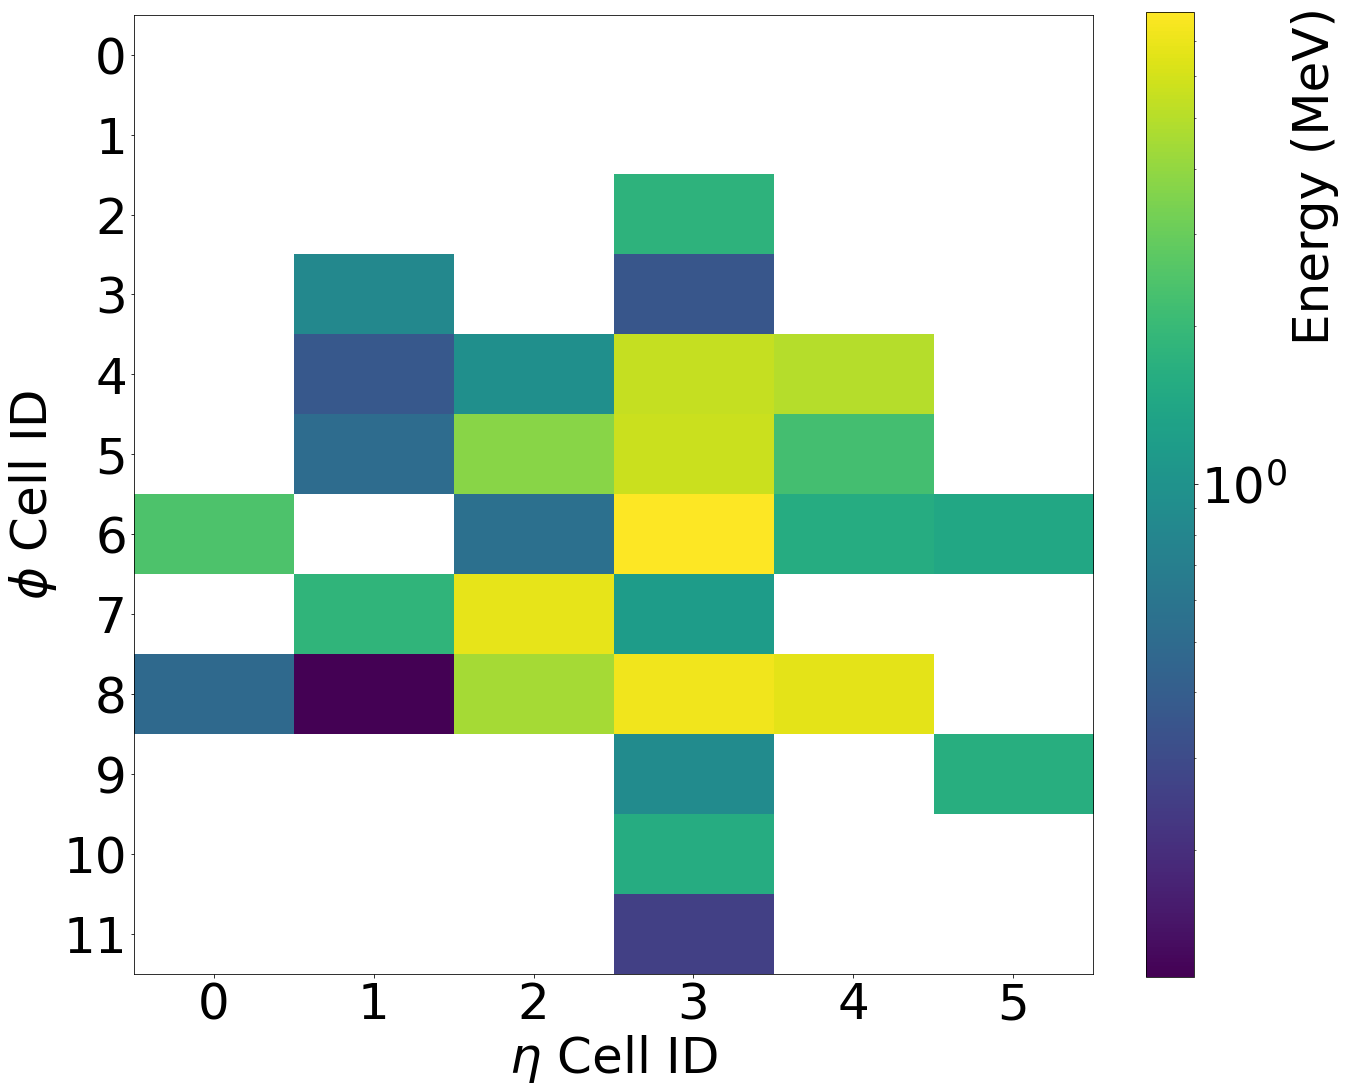

In [14]:
plot_image(eplus_2[imageix], layer=2)

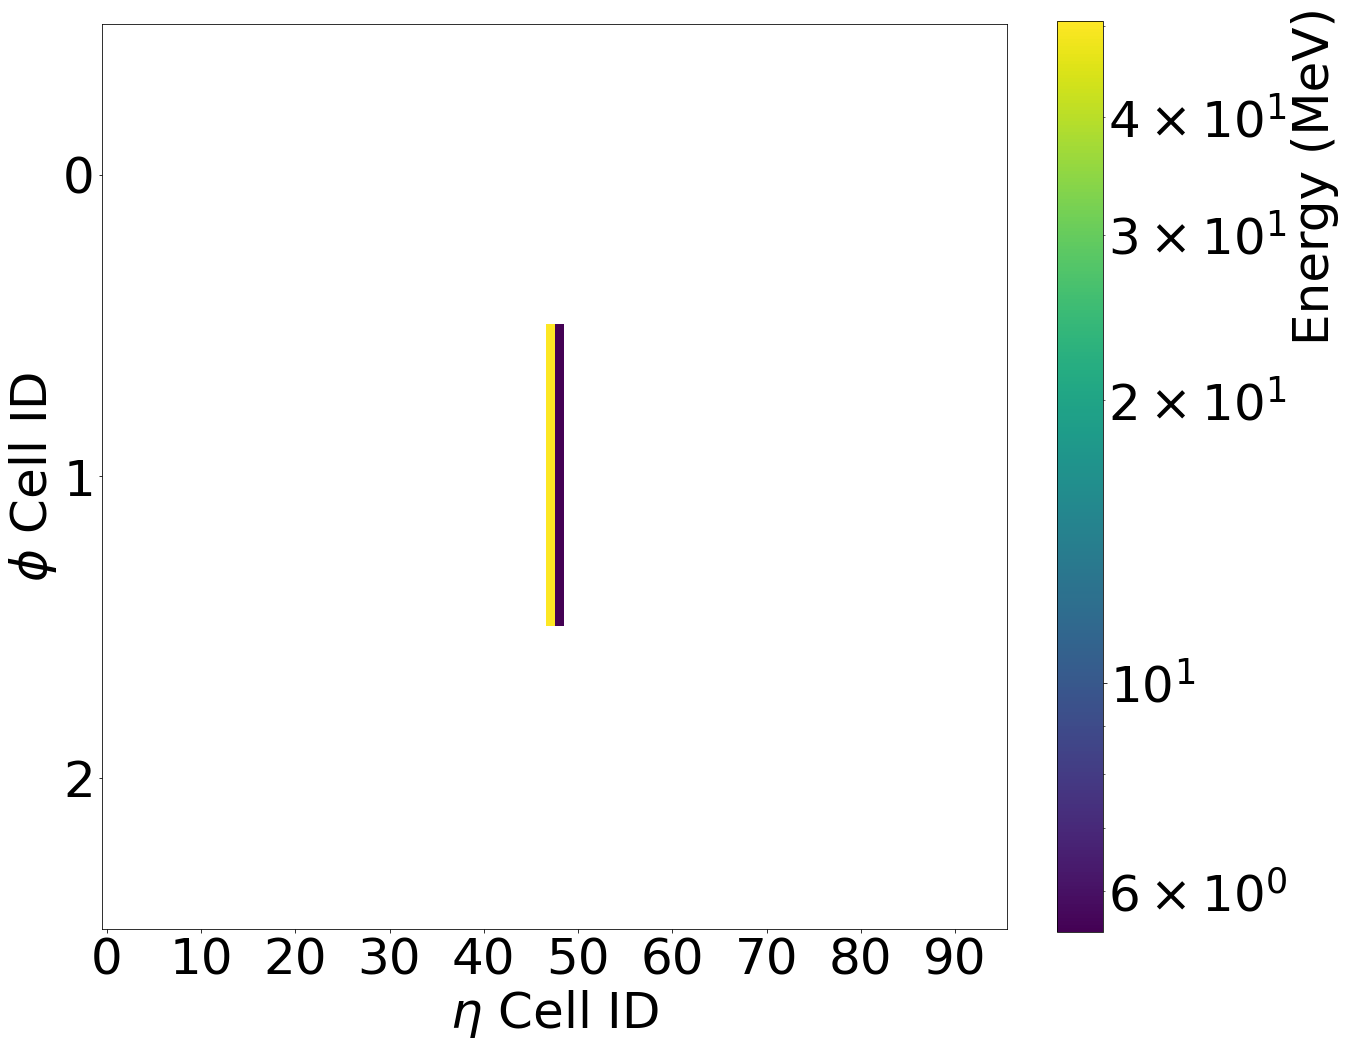

In [15]:
plot_image(piplus_0[imageix], layer=0)

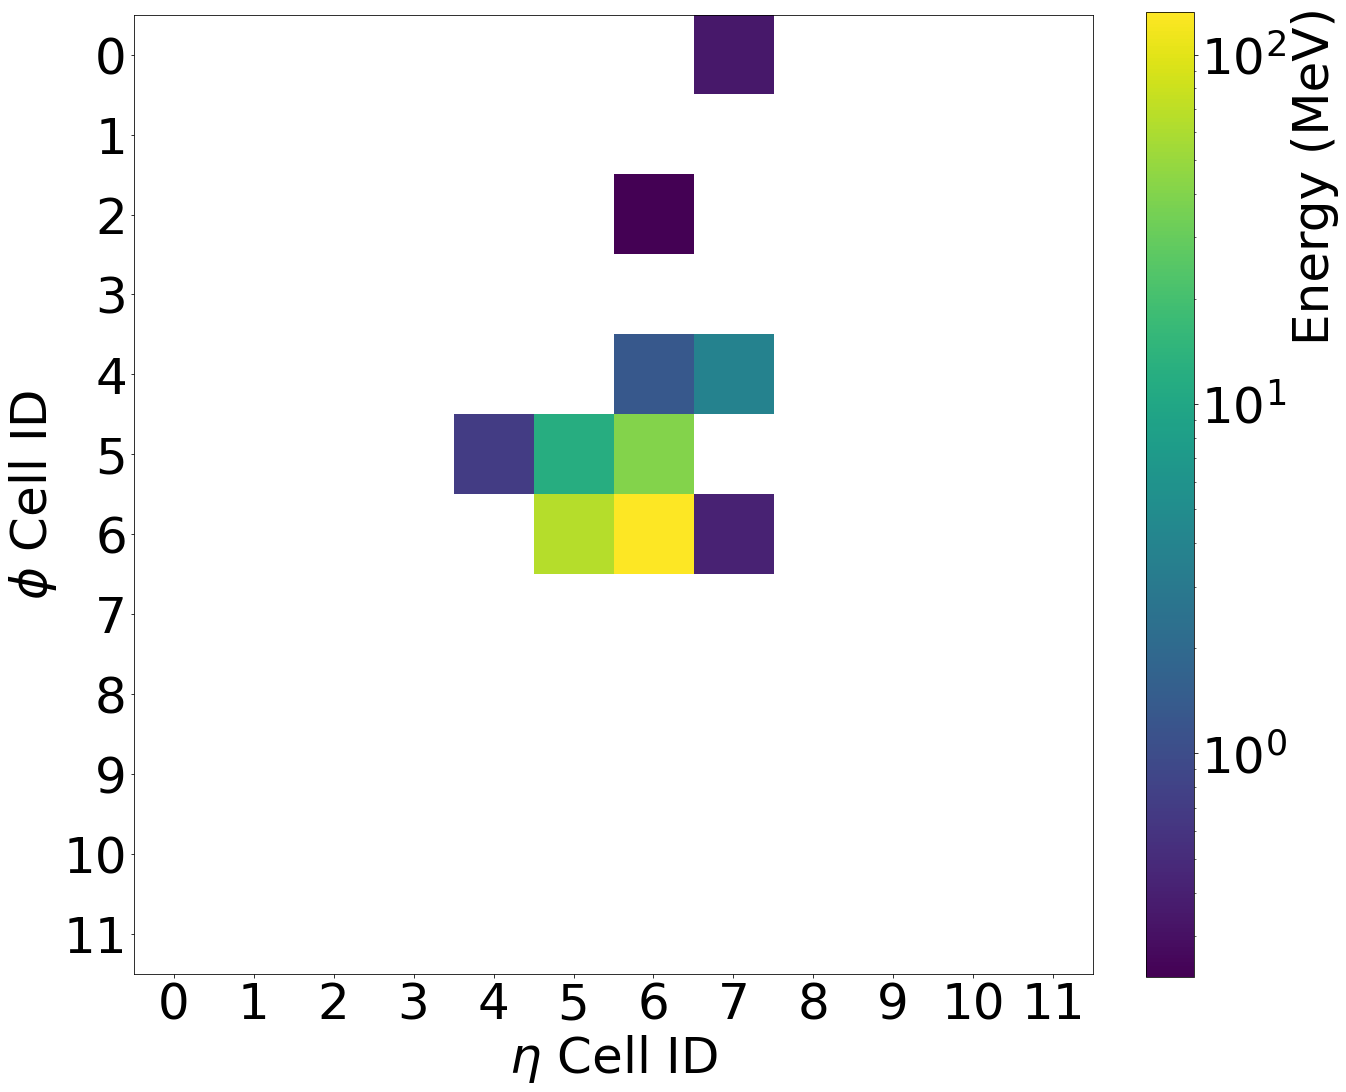

In [16]:
plot_image(piplus_1[imageix], layer=1)

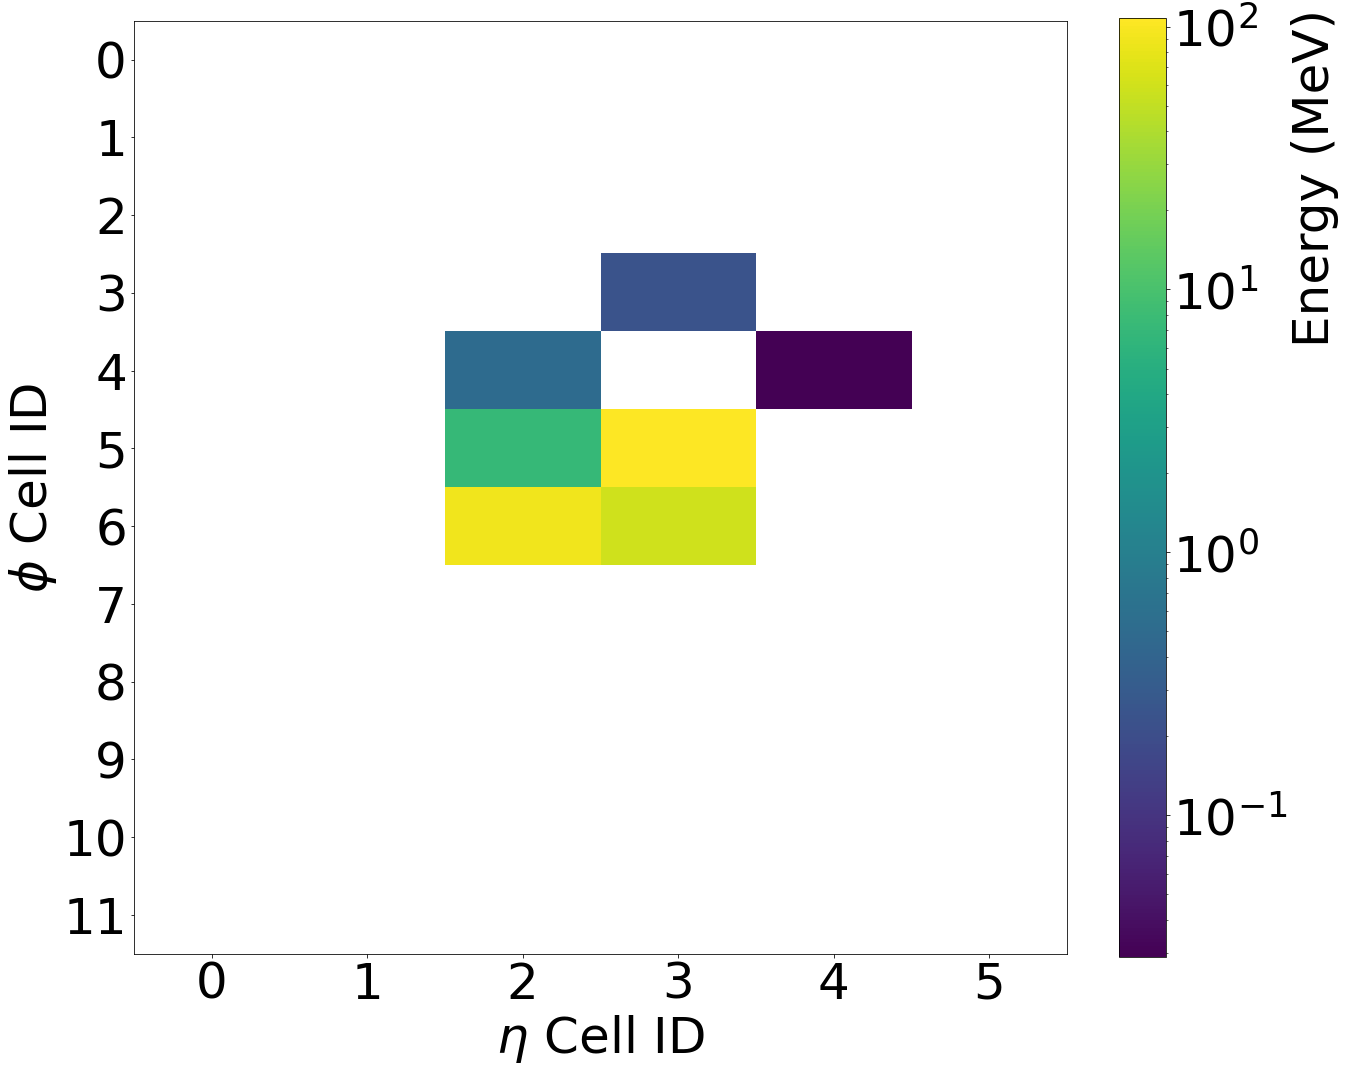

In [17]:
plot_image(piplus_2[imageix], layer=2)